### 예제 1
(handspan.txt) 다음은 167명의 학생들에 대해 성별(Sex)과 신장(Height) 그리고 손 한뼘의 길이
(HandSpan)를 측정한 자료이다.

In [71]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn

data = pd.read_csv("handspan.txt", sep = "\t")
data.head()

,Sex,Height,HandSpan
0,Female,68.0,21.5
1,Male,71.0,23.5
2,Male,73.0,22.5
3,Female,64.0,18.0
4,Male,68.0,23.5


**(1) 신장과 손 한뼘의 길이는 서로 상관관계가 존재하는가? 표본 상관계수를 구하고 두 변수 의 산점도를 그려보
자. 두 변수 사이에 선형적 연관성이 존재하는가?**

- 표본 상관계수
    - 0.7395375로 상당히 높은 편이므로 두 변수 간에 상관관계가 존재한다고 볼 수 있다.
- 산점도
    - 산점도의 점들이 직선 주변에 모여 있으므로 두 변수 간에 어느 정도 선형적 연관성이 있음을 확인할 수 있다.
- 결론
    - 두 변수 사이에 선형적 연관성(상관관계)이 존재한다.

In [72]:
# 표본 상관계수
np.corrcoef(data.Height, data.HandSpan)

array([[1.       , 0.7395375],
       [0.7395375, 1.       ]])

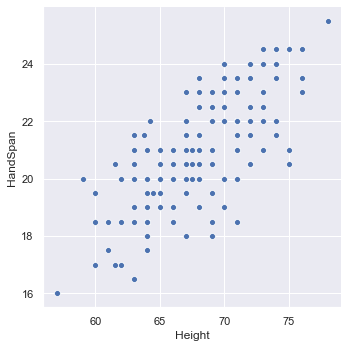

In [73]:
# 산점도
seaborn.set(rc = {'figure.figsize': (3, 3)})
seaborn.relplot(x = 'Height', y = 'HandSpan', data = data)
plt.show()

**(2) 신장과 손 한뼘의 길이사이에 상관관계가 존재하는지 유의수준 5%에서 검정하여라.**

- 상관관계 유무 검정 결과, 유의확률은 3.5993040590359566e-30으로 매우 작은 것으로 확인되었다. 따라서 유의수준 5% 하에서 **두 변수 사이에 상관관계가 존재한다**는 통계적 근거가 충분하다.

In [74]:
# 상관분석
t, p = stats.pearsonr(data.Height, data.HandSpan)
print("Pearson's correlation coefficient: %s \np-value: %s" % (t, p))

Pearson's correlation coefficient: 0.7395375015506631 
p-value: 3.5993040590359566e-30


**(3) 신장(y)과 손 한뼘의 길이(x)에 대해 단순선형회귀모형을 적용해보자. 추정된 회귀식을 구하고 유의수준 5% 에서 회귀 직선의 유의성을 검정하시오.**

- 추정된 회귀식
    - summary 함수의 두 번째 출력 결과에서 추정된 회귀계수들을 보면 된다.
    - 추정된 회귀 모형은 `y bar = 35.53 + 1.56x` 임을 알 수 있다.
- 회귀직선의 유의성 검정
    - summary 함수의 첫 번째 출력 결과를 보면 된다.
    - 검정통계량(F-statistic)의 값은 199.2이고 유의확률(Prob (F-statistic))은 매우 작은 것으로 나타났다. 따라서 **유의수준 5% 하에서 회귀직선이 유의하다**고 볼 수 있다. 또한 결정계수(R-squared)는 0.547이므로 전체 자료의 산포 중 약 54.7%가 회귀직선으로 설명이 가능하다.

In [75]:
from statsmodels.formula.api import ols

model = ols("Height ~ HandSpan", data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Height   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     199.2
Date:                Tue, 03 Dec 2019   Prob (F-statistic):           3.60e-30
Time:                        23:50:54   Log-Likelihood:                -404.55
No. Observations:                 167   AIC:                             813.1
Df Residuals:                     165   BIC:                             819.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.5250      2.316     15.339      0.0

**(4) 단순 선형 회귀모형의 적용은 타당한가? 잔차도를 이용하여 답하시오.**

- 잔차도를 확인한 결과, 잔차들은 특정한 패턴을 보이거나 등분산성 가정을 위배한 것으로 보이지는 않는다. 하지만 몇몇 잔차의 경우 범위를 벗어난 큰 값(28, 94, 5)을 가지는 것으로 확인된다.
- 정규분위수 그래프를 확인해보면 양 끝쪽으로 직선에서 아주 살짝 벗어난 점들이 관찰되는데 대부분의 잔차는 직선 주위에 몰려있는 것을 확인할 수 있다. 
- 따라서 단순선형모형의 적용은 타당함을 알 수 있다.

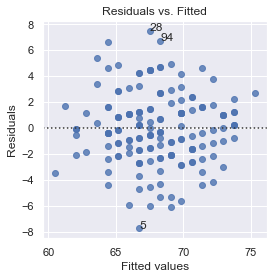

In [76]:
from statsmodels.graphics.gofplots import ProbPlot

f = model.fittedvalues
r = model.resid
ar = np.abs(r)

ar_sort = ar.sort_values(ascending = False)
top_3_ar = ar_sort[0:3]

seaborn.set(rc = {'figure.figsize': (4, 4)})
seaborn.residplot(f, r, data = data)

plt.title("Residuals vs. Fitted")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

for i in top_3_ar.index:
    plt.annotate(i, xy = (f[i], r[i]))
plt.show()

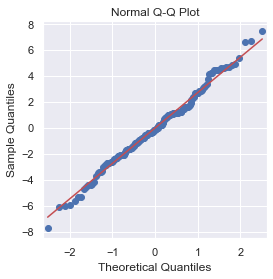

In [77]:
QQ = ProbPlot(r)
plot = QQ.qqplot(line = 's', color = 'C0', lw = 1)

plt.title("Normal Q-Q Plot")
plt.show()

### 예제 2
주어진 자료는 브레이크가 작동되는 순간의 자동차의 주행 속도 (Speed)에 따른 자동차
제동 거리(StopDist)를 조사한 자료이다

In [78]:
car = pd.read_csv("carstopping.txt", sep = "\t")
car.head()

,StopDist,Speed
0,4,4
1,2,5
2,8,5
3,8,5
4,4,5


**(1) 자동차의 주행 속도에 따른 자동차의 제동거리 간에는 서로 상관관계가 존재하는가? 상관 분석을 통해 이를 확인해보자.**
- 상관계수가 0.9355로 매우 높으므로 자동차의 주행 속도와 자동차의 제동 거리 간에는 강한 상관관계가 존재한다.
- 상관관계 유무 검정 결과, 유의확률은 2.975121583729983e-29으로 매우 작은 것으로 확인되었다. 따라서 유의수준 5% 하에서 **두 변수 사이에 선형적 관계가 존재한다**는 통계적 근거가 충분하다.

In [79]:
t, p = stats.pearsonr(car.StopDist, car.Speed)
print("Pearson's correlation coefficient: %s \np-value: %s" % (t, p))

Pearson's correlation coefficient: 0.9355036785004627 
p-value: 2.975121583729983e-29


**(2) 주어진 자료에 단순 선형회귀모형을 적용한 후 결과를 확인해 보자. 유의수준 5%에서 모 형은 유의한가?**

- 자동차의 주행 속도(x)를 설명변수, 자동차의 제동 거리(y)를 종속변수로 설정하였다.
- 추정된 회귀식
    - summary 함수의 두 번째 출력 결과에서 추정된 회귀계수들을 보면 된다.
    - 추정된 회귀 모형은 `y bar = -20.27 + 3.14x` 임을 알 수 있다.
- 회귀직선의 유의성 검정
    - summary 함수의 첫 번째 출력 결과를 보면 된다.
    - 검정통계량(F-statistic)의 값은 427.7이고 유의확률(Prob (F-statistic))은 매우 작은 것으로 나타났다. 따라서 **유의수준 5% 하에서 회귀직선이 유의하다**고 볼 수 있다. 또한 결정계수(R-squared)는 0.875이므로 전체 자료의 산포 중 약 87.5%가 회귀직선으로 설명이 가능하다.

In [80]:
model = ols("StopDist ~ Speed", car).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               StopDist   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     427.7
Date:                Tue, 03 Dec 2019   Prob (F-statistic):           2.98e-29
Time:                        23:50:56   Log-Likelihood:                -243.86
No. Observations:                  63   AIC:                             491.7
Df Residuals:                      61   BIC:                             496.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -20.2734      3.238     -6.260      0.0

**(3) 적합된 회귀 모형의 잔차도를 확인해 보자. 단순선형회귀모형의 적용이 타당하다고 볼 수 있는가?**


- 잔차도를 확인한 결과, 잔차들이 강한 패턴을 보이지는 않지만, 살짝 U자형의 모양에서 오른쪽으로 갈수록 점점 퍼지는 형태를 띠고 있다. 또한 몇몇 잔차의 경우 범위를 벗어난 큰 값(54, 60, 62)을 가지는 것으로 확인된다.
- 정규분위수 그래프를 확인해보면 대부분의 잔차는 직선 주위에 몰려있지만, 오른쪽 끝으로 갈수록 정규분포를 벗어나는 값이 많다는 것을 확인할 수 있다.
- 더욱 엄밀한 분석이 필요하겠지만, 위와 같은 분석을 통해서는 단순선형모형의 적용이 타당하지 않다고 보여진다.

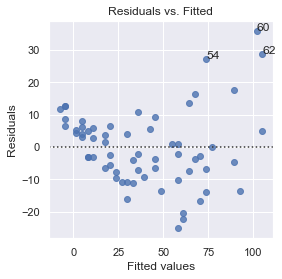

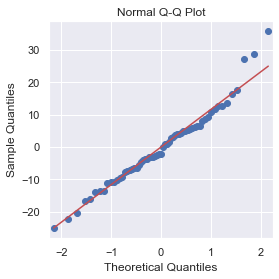

In [81]:
f = model.fittedvalues
r = model.resid
ar = np.abs(r)

ar_sort = ar.sort_values(ascending = False)
top_3_ar = ar_sort[0:3]

seaborn.set(rc = {'figure.figsize': (4, 4)})
seaborn.residplot(f, r, data = car)

plt.title("Residuals vs. Fitted")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

for i in top_3_ar.index:
    plt.annotate(i, xy = (f[i], r[i]))
plt.show()

QQ = ProbPlot(r)
plot = QQ.qqplot(line = 's', color = 'C0', lw = 1)

plt.title("Normal Q-Q Plot")
plt.show()

**(4) 자동차의 주행속도와 자동차의 제동거리 사이의 산점도를 확인해보자.**

- 문제에 주어진 바와 같이 두 변수 사이에는 곡률(curvature)관 계가 존재하며, 또한 x 값이 증가함에 따라 y값의 산포가 증가하는 것을 확 인할 수 있다. 따라서 주어진 자료에 대해서는 단순 선형회귀 모형의 적용이 적절하지 않다. 

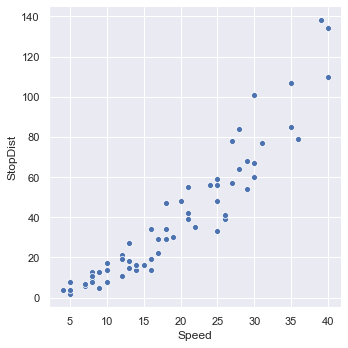

In [82]:
# 산점도
seaborn.set(rc = {'figure.figsize': (3, 3)})
seaborn.relplot(x = 'Speed', y = 'StopDist', data = car)
plt.show()

**(4) 이어서 이러한 문제를 해결하기 위한 방법 중 하나는 반응변수에 적절한 함수 변환(transformation) 을 취하는 것이다. 즉, 반응변수에 제곱근을 취한 새로운 변수(sqrt.dist)를 만든 후, 새로운 변수 sqrt.dist와 주행속도(Speed)의 산점도를 다시 한번 그려보자. 새로운 산점도는 어떠한 형태를 보 이고 있는가?**

- 새로운 산점도는 Speed와 sqrt.dist 두 변수 간의 뚜렷한 선형 관계를 보이고 있다.

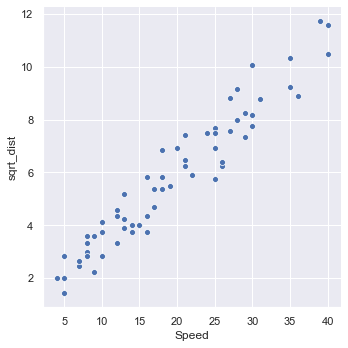

In [84]:
car["sqrt_dist"] = car.apply(lambda row: np.sqrt(row.StopDist), axis=1)

seaborn.set(rc = {'figure.figsize': (3, 3)})
seaborn.relplot(x = 'Speed', y = 'sqrt_dist', data = car)
plt.show()

**(5) 새로운 변수 sqrt.dist와 Speed에 대해 단순선형회귀모형을 적합 시킨 후 결과를 확인해 보자. 새로운 모형의 결정계수  값은 얼마인가? (1)번에서 구한 모형의 결정계수 값과 비교 해보시오.**

- 자동차의 주행 속도(x)를 설명변수, 적절한 함수 변환을 취한 자동차의 제동 거리(y)를 종속변수로 설정하였다.
- 추정된 회귀식
    - summary 함수의 두 번째 출력 결과에서 추정된 회귀계수들을 보면 된다.
    - 추정된 회귀 모형은 `y bar = 0.9183 + 0.2526x` 임을 알 수 있다.
- 회귀직선의 유의성 검정
    - summary 함수의 첫 번째 출력 결과를 보면 된다.
    - 검정통계량(F-statistic)의 값은 746.2이고 유의확률(Prob (F-statistic))은 매우 작은 것으로 나타났다. 따라서 **유의수준 5% 하에서 회귀직선이 유의하다**고 볼 수 있다. 또한 결정계수(R-squared)는 0.924이므로 전체 자료의 산포 중 약 92.4%가 회귀직선으로 설명이 가능하다. 이는 (1) 번에서 구한 모형의 결정 계수 값이었던 0.875보다 더 잘 설명하는 방향으로 개선된 값이다.

In [86]:
new_model = ols("sqrt_dist ~ Speed", car).fit()
print(new_model.summary())

                            OLS Regression Results                            
Dep. Variable:              sqrt_dist   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     746.2
Date:                Tue, 03 Dec 2019   Prob (F-statistic):           6.51e-36
Time:                        23:53:36   Log-Likelihood:                -67.617
No. Observations:                  63   AIC:                             139.2
Df Residuals:                      61   BIC:                             143.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9183      0.197      4.652      0.0

**(6) 새로운 모형의 잔차도를 확인해보자. 단순선형회귀모형의 적용이 타당하다고 볼 수 있는 가?**


- 잔차도를 확인한 결과, 잔차들은 특정한 패턴을 보이거나 등분산성 가정을 위배한 것으로 보이지는 않는다. 하지만 몇몇 잔차의 경우 범위를 벗어난 큰 값(31, 54, 41)을 가지는 것으로 확인된다.
- 정규분위수 그래프를 확인해보면 대부분의 잔차는 직선 주위에 몰려있는 것을 확인할 수 있다. 
- 따라서 단순선형모형의 적용은 타당함을 알 수 있다.

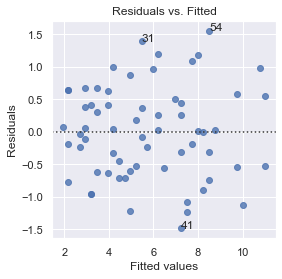

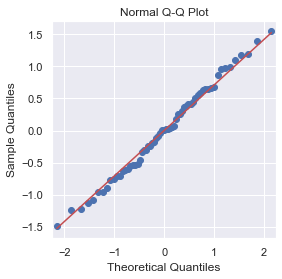

In [87]:
f = new_model.fittedvalues
r = new_model.resid
ar = np.abs(r)

ar_sort = ar.sort_values(ascending = False)
top_3_ar = ar_sort[0:3]

seaborn.set(rc = {'figure.figsize': (4, 4)})
seaborn.residplot(f, r, data = car)

plt.title("Residuals vs. Fitted")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

for i in top_3_ar.index:
    plt.annotate(i, xy = (f[i], r[i]))
plt.show()

QQ = ProbPlot(r)
plot = QQ.qqplot(line = 's', color = 'C0', lw = 1)

plt.title("Normal Q-Q Plot")
plt.show()

### 예제 3

다음은 미국 내 113개의 병원들을 대상으로 입원 기간 동안 환자들이 받는 감염 위험과 관련
된 사항들을 조사하였다. 다음은 주요 변수에 대한 설명이다.

In [21]:
hospital = pd.read_csv("hospital.txt", sep = "\t")
hospital.head()

,ID,Stay,Age,InfctRsk,Culture,Xray,Beds,MedSchool,Region,Census,Nurses,Facilities
0,1,7.13,55.7,4.1,9.0,39.6,279,2,4,207,241,60.0
1,2,8.82,58.2,1.6,3.8,51.7,80,2,2,51,52,40.0
2,3,8.34,56.9,2.7,8.1,74.0,107,2,3,82,54,20.0
3,4,8.95,53.7,5.6,18.9,122.8,147,2,4,53,148,40.0
4,5,11.20,56.5,5.7,34.5,88.9,180,2,1,134,151,40.0


**(1) 종속변수와 각 설명변수들 간에는 유의한 상관관계가 존재하는가? 산점도와 상관분석을 통해 이를 확인해보 시오.**

1. 산점도
    - Stay: 어느 정도 직선형태를 그리는 듯 보이므로 InfctRsk 변수와 Stay 변수 간에 상관관계가 존재한다고 볼 수 있다.
    - Age: 직선 주위에 점이 몰려 있지 않고 불규칙하게 흩어져 있으므로 상관관계가 존재한다고 볼 수 없다.
    - Xray: 어느 정도 직선형태를 그리는 듯 보이므로 InfctRsk 변수와 Xray 변수 간에 상관관계가 존재한다고 볼 수 있다.

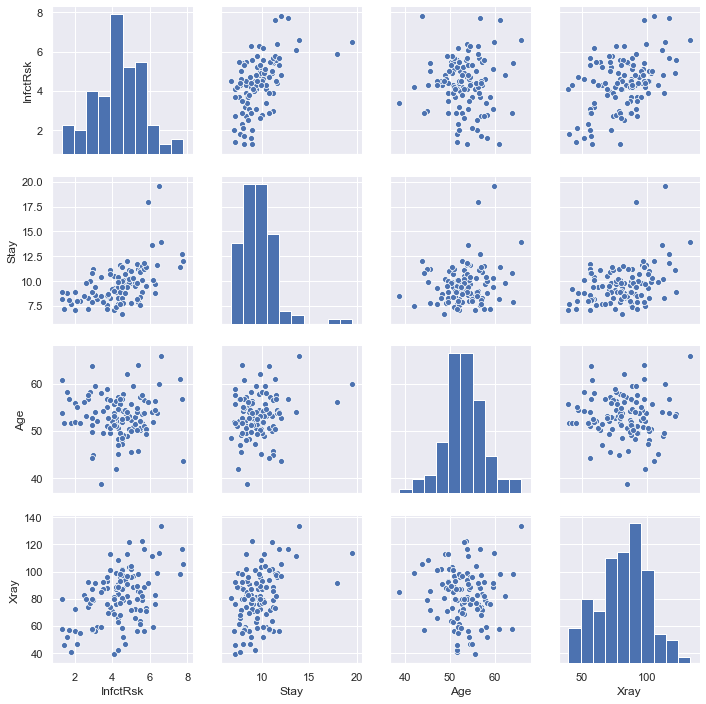

In [55]:
filtered = hospital[['InfctRsk', 'Stay', 'Age', 'Xray']].copy()
seaborn.pairplot(data = filtered)
plt.show()

2. 상관분석
    - Stay: 유의확률이 1.17e-09로 충분히 작기 때문에 유의수준 0.05 하에서 상관관계가 있다고 볼 수 있다.
    - Age: 유의확률이 충분히 작지 않으므로 유의수준 0.05 하에서 상관관계가 있다고 보기 어렵다. 상관계수 역시 0.001로 매우 낮다.
    - Xray: 유의확률이 4.58e-07로 충분히 작기 때문에 유의수준 0.05 하에서 상관관계가 있다고 볼 수 있다.

In [53]:
# Stay
t, p = stats.pearsonr(hospital.Stay, hospital.InfctRsk)
print("* Stay\nPearson's correlation coefficient: %s \np-value: %s" % (t, p))
# Age
t, p = stats.pearsonr(hospital.Age, hospital.InfctRsk)
print("* Age\nPearson's correlation coefficient: %s \np-value: %s" % (t, p))
# Xray
t, p = stats.pearsonr(hospital.Xray, hospital.InfctRsk)
print("* Xray\nPearson's correlation coefficient: %s \np-value: %s" % (t, p))

* Stay
Pearson's correlation coefficient: 0.5334438309449093 
p-value: 1.1769611863413543e-09
* Age
Pearson's correlation coefficient: 0.0010931661486623945 
p-value: 0.99083146029816
* Xray
Pearson's correlation coefficient: 0.4533915569793219 
p-value: 4.584845452365122e-07


**(2) 주어진 자료에 다중선형회귀모형을 적용해보자. 유의수준 5%에서 모형은 유의하다고 할 수 있는가? 각 변수 들은 유의한가?**

- 주어진 세 변수를 독립변수로 설정한다.
- 추정된 회귀식
    - summary 함수의 두 번째 출력 결과에서 추정된 회귀계수들을 보면 된다.
    - 추정된 회귀 모형은 `y bar = 1.0012 + 0.3082 Stay - 0.0230 Age + 0.0197 Xray` 임을 알 수 있다.
- 회귀직선의 유의성 검정
    - summary 함수의 첫 번째 출력 결과를 보면 된다.
    - 검정통계량(F-statistic)의 값은 20.70이고 유의확률(Prob (F-statistic))은 매우 작은 것으로 나타났다. 따라서 **유의수준 5% 하에서 회귀직선이 유의하다**고 볼 수 있다. 또한 수정된 결정계수(Adj. R-squared)는 0.345이므로 전체 자료의 산포 중 약 34.5%가 회귀직선으로 설명이 가능하다.
- 각 변수들은 유의한가?
    - 각 계수별 유의성 검정 결과, Stay와 Xray의 유의확률이 각각 약 0.000, 약 0.001로 유의수준 5%보다 작게 나타났다. 따라서 **Stay와 Xray는 InfctRsk를 설명함에 있어서 유의한 변수**라고 볼 수 있다.
    - 한편 Age는 유의확률이 유의수준에 비해 훨씬 크게 나왔으므로 InfctRsk를 유의하게 설명한다고 보기 어렵다.


In [57]:
model = ols("InfctRsk ~ Stay + Age + Xray", hospital).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               InfctRsk   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     20.70
Date:                Tue, 03 Dec 2019   Prob (F-statistic):           1.09e-10
Time:                        23:33:52   Log-Likelihood:                -167.51
No. Observations:                 113   AIC:                             343.0
Df Residuals:                     109   BIC:                             353.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0012      1.315      0.761      0.4

**(3) 다중선형회귀모형의 적용은 타당하다고 볼 수 있는가? 잔차도를 통해 확인해보자.**

- 잔차도를 확인해본 결과, 잔차의 값이 매우 큰 관측치가 몇 개 존재(9, 52, 92)하기는 하지만 특별한 패턴이 관측되지는 않았다.
- 또한 QQ plot에서도 정규분포를 벗어난다는 뚜렷한 증거는 발견되지 않았다.
- 따라서 주어진 자료에 대한 중선형회귀모형의 적용은 타당함을 알 수 있고, 적용된 모형을 통한 추론은 의미가 있다고 할 수 있다.

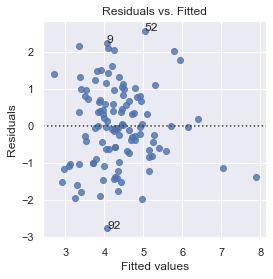

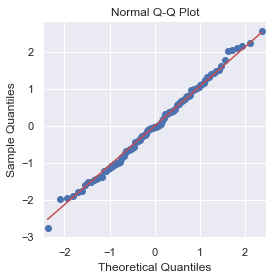

In [59]:
f = model.fittedvalues
r = model.resid
ar = np.abs(r)

ar_sort = ar.sort_values(ascending = False)
top_3_ar = ar_sort[0:3]

seaborn.set(rc = {'figure.figsize': (4, 4)})
seaborn.residplot(f, r, data = hospital)

plt.title("Residuals vs. Fitted")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

for i in top_3_ar.index:
    plt.annotate(i, xy = (f[i], r[i]))
plt.show()

QQ = ProbPlot(r)
plot = QQ.qqplot(line = 's', color = 'C0', lw = 1)

plt.title("Normal Q-Q Plot")
plt.show()